In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df= pd.read_csv('C://Users//User//Desktop//MSc Westminster//Dissertation//DataSets//Heart_Attack_Prediction.csv')

In [2]:
columns=df.columns

for column in columns:
    if df[column].dtype=="int32":
        df[column]=df[column].astype("int16")
    elif df[column].dtype=="float64":
        df[column]=df[column].astype("float16")
    elif df[column].dtype=="object":
        df[column]=df[column].astype("category")

In [3]:
df['Sex']= df['Sex'].map({'Female': 0, 'Male': 1})
df['Sex']= pd.to_numeric(df['Sex'])

df['Diet']= df['Diet'].map({'Healthy': 0, 'Average': 1, 'Unhealthy':2})
df['Diet']= pd.to_numeric(df['Diet'])

df[['HBP', 'LBP']]= df['Blood Pressure'].str.split('/', expand= True)
df['HBP']= pd.to_numeric(df['HBP'])
df['LBP']= pd.to_numeric(df['LBP'])

df['Diabetes'] = df['Diabetes'].map({0: 1, 1: 0})

df['Exercise Hours Per Week']= round(df['Exercise Hours Per Week'], 0)

df['Sedentary Hours Per Day']= round(df['Sedentary Hours Per Day'], 0)

df['Income']= round(df['Income'], 0)

df['BMI']= round(df['BMI'], 0)

df = df.drop(columns=['Patient ID', 'Blood Pressure', 'Country', 'Continent', 'Hemisphere'])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              8763 non-null   int64  
 1   Sex                              8763 non-null   int64  
 2   Cholesterol                      8763 non-null   int64  
 3   Heart Rate                       8763 non-null   int64  
 4   Diabetes                         8763 non-null   int64  
 5   Family History                   8763 non-null   int64  
 6   Smoking                          8763 non-null   int64  
 7   Obesity                          8763 non-null   int64  
 8   Alcohol Consumption              8763 non-null   int64  
 9   Exercise Hours Per Week          8763 non-null   float16
 10  Diet                             8763 non-null   int64  
 11  Previous Heart Problems          8763 non-null   int64  
 12  Medication Use      

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,8763.0,5.370798e+01,21.249509,18.0,35.0,54.0,72.0,90.0
Sex,8763.0,6.973639e-01,0.459425,0.0,0.0,1.0,1.0,1.0
Cholesterol,8763.0,2.598772e+02,80.863276,120.0,192.0,259.0,330.0,400.0
Heart Rate,8763.0,7.502168e+01,20.550948,40.0,57.0,75.0,93.0,110.0
Diabetes,8763.0,3.477120e-01,0.476271,0.0,0.0,0.0,1.0,1.0
Family History,8763.0,4.929819e-01,0.499979,0.0,0.0,0.0,1.0,1.0
Smoking,8763.0,8.968390e-01,0.304186,0.0,1.0,1.0,1.0,1.0
Obesity,8763.0,5.014265e-01,0.500026,0.0,0.0,1.0,1.0,1.0
Alcohol Consumption,8763.0,5.980828e-01,0.490313,0.0,0.0,1.0,1.0,1.0
Exercise Hours Per Week,8763.0,inf,5.796875,0.0,5.0,10.0,15.0,20.0


In [6]:
X= df.drop(['Heart Attack Risk'], axis= 1)
y= df['Heart Attack Risk']

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [8]:
from sklearn.preprocessing import RobustScaler
scaler= RobustScaler()
scaler.fit(X_train)

X_train= scaler.transform(X_train)
X_test= scaler.transform(X_test)

--- LogisticRegression ---

              precision    recall  f1-score   support

           0       0.64      1.00      0.78      1125
           1       0.00      0.00      0.00       628

    accuracy                           0.64      1753
   macro avg       0.32      0.50      0.39      1753
weighted avg       0.41      0.64      0.50      1753

Precision: 0.0
Accuracy: 0.6417569880205363
AUC: 0.4828351026185421


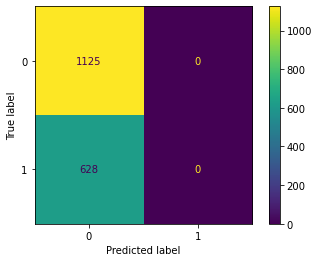

In [9]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression(max_iter= 1000, random_state=15)
lr.fit(X_train, y_train)
y_pred_lr= lr.predict(X_test)
y_pred_prob_lr= lr.predict_proba(X_test)[:,1]

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, precision_score, roc_auc_score, accuracy_score 
cm= confusion_matrix(y_test, y_pred_lr, labels= lr.classes_)
print(classification_report(y_test, y_pred_lr, zero_division=0))
print('Precision:', precision_score(y_test, y_pred_lr, zero_division=0))
print('Accuracy:', accuracy_score(y_test, y_pred_lr))
print('AUC:', roc_auc_score(y_test, y_pred_prob_lr))
dcm_lr= ConfusionMatrixDisplay(cm, display_labels= lr.classes_)
dcm_lr.plot()

--- DecisionTreeClassifier ---

              precision    recall  f1-score   support

           0       0.64      0.65      0.64      1125
           1       0.36      0.36      0.36       628

    accuracy                           0.54      1753
   macro avg       0.50      0.50      0.50      1753
weighted avg       0.54      0.54      0.54      1753

Precision: 0.3605769230769231
Accuracy: 0.54249857387336
AUC: 0.5018067940552017


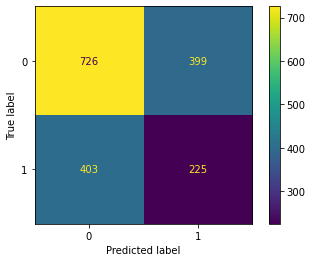

In [10]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier(random_state=15)
dt.fit(X_train, y_train)
y_pred_dt= dt.predict(X_test)
y_pred_prob_dt= dt.predict_proba(X_test)[:,1]

cm= confusion_matrix(y_test, y_pred_dt, labels= dt.classes_)
print(classification_report(y_test, y_pred_dt, zero_division=0))
print('Precision:', precision_score(y_test, y_pred_dt, zero_division=0))
print('Accuracy:', accuracy_score(y_test, y_pred_dt))
print('AUC:', roc_auc_score(y_test, y_pred_prob_dt))
dcm_dt= ConfusionMatrixDisplay(cm, display_labels= dt.classes_)
dcm_dt.plot()

--- Tuned - DecisionTreeClassifier ---

In [11]:
from sklearn.model_selection import GridSearchCV
param_grid= {
             'max_depth': [None, 10, 20, 30, 40, 50],
             'min_samples_split': [2, 10, 20],
             'min_samples_leaf': [1, 5, 10],
             'max_features': [None, 'sqrt', 'log2'],
             'criterion': ['gini', 'entropy']
            }

gs_dt= GridSearchCV(estimator= dt, param_grid= param_grid, cv= 5, scoring= 'precision')
gs_dt.fit(X_train, y_train)

print("Best Parameters:", gs_dt.best_params_)
print("Best Precision Score:", gs_dt.best_score_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 2}
Best Precision Score: 0.3858297654139373


              precision    recall  f1-score   support

           0       0.63      0.87      0.73      1125
           1       0.30      0.10      0.15       628

    accuracy                           0.59      1753
   macro avg       0.47      0.48      0.44      1753
weighted avg       0.51      0.59      0.52      1753

Precision: 0.2975609756097561
Accuracy: 0.5944095835710211
AUC: 0.4885138004246285


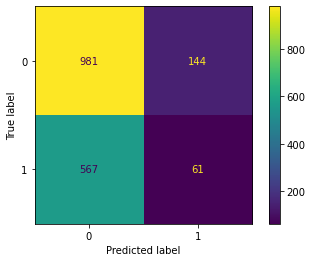

In [12]:
tuned_dt= gs_dt.best_estimator_
y_pred_tuned_dt= tuned_dt.predict(X_test)
y_pred_prob_tuned_dt= tuned_dt.predict_proba(X_test)[:,1]

cm= confusion_matrix(y_test, y_pred_tuned_dt, labels= tuned_dt.classes_)
print(classification_report(y_test, y_pred_tuned_dt, zero_division=0))
print('Precision:', precision_score(y_test, y_pred_tuned_dt, zero_division=0))
print('Accuracy:', accuracy_score(y_test, y_pred_tuned_dt))
print('AUC:', roc_auc_score(y_test, y_pred_prob_tuned_dt))
dcm_tuned_dt= ConfusionMatrixDisplay(cm, display_labels= tuned_dt.classes_)
dcm_tuned_dt.plot()

--- KNeighborsClassifier ---

              precision    recall  f1-score   support

           0       0.64      0.75      0.69      1125
           1       0.35      0.24      0.29       628

    accuracy                           0.57      1753
   macro avg       0.49      0.49      0.49      1753
weighted avg       0.53      0.57      0.54      1753

Precision: 0.3470319634703196
Accuracy: 0.5653166001140901
AUC: 0.48260226468506723


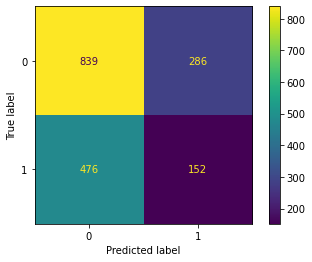

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn= knn.predict(X_test)
y_pred_prob_knn= knn.predict_proba(X_test)[:,1]

cm= confusion_matrix(y_test, y_pred_knn, labels= knn.classes_)
print(classification_report(y_test, y_pred_knn, zero_division=0))
print('Precision:', precision_score(y_test, y_pred_knn, zero_division=0))
print('Accuracy:', accuracy_score(y_test, y_pred_knn))
print('AUC:', roc_auc_score(y_test, y_pred_prob_knn))
dcm_knn= ConfusionMatrixDisplay(cm, display_labels= knn.classes_)
dcm_knn.plot()

--- Tuned - KNeighborsClassifier ---

In [14]:
param_grid= {
             'n_neighbors': np.arange(1,40),
             'weights': ['uniform', 'distance'],
             'metric': ['euclidean', 'manhattan', 'minkowski']
            }

gs_knn= GridSearchCV(estimator= knn, param_grid= param_grid, cv=5, scoring= 'precision')
gs_knn.fit(X_train, y_train)
print("Best Parameters:", gs_knn.best_params_)
print("Best Precision Score:", gs_knn.best_score_)

Best Parameters: {'metric': 'euclidean', 'n_neighbors': 38, 'weights': 'uniform'}
Best Precision Score: 0.42384760921912623


              precision    recall  f1-score   support

           0       0.64      0.97      0.77      1125
           1       0.34      0.03      0.05       628

    accuracy                           0.63      1753
   macro avg       0.49      0.50      0.41      1753
weighted avg       0.53      0.63      0.51      1753

Precision: 0.3404255319148936
Accuracy: 0.6332002281802624
AUC: 0.5072519462137296


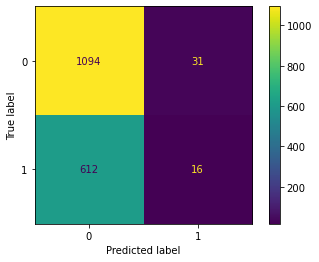

In [15]:
tuned_knn= gs_knn.best_estimator_
y_pred_tuned_knn= tuned_knn.predict(X_test)
y_pred_prob_tuned_knn= tuned_knn.predict_proba(X_test)[:,1]

cm= confusion_matrix(y_test, y_pred_tuned_knn, labels= tuned_knn.classes_)
print(classification_report(y_test, y_pred_tuned_knn, zero_division=0))
print('Precision:', precision_score(y_test, y_pred_tuned_knn, zero_division=0))
print('Accuracy:', accuracy_score(y_test, y_pred_tuned_knn))
print('AUC:', roc_auc_score(y_test, y_pred_prob_tuned_knn))
dcm_tuned_knn= ConfusionMatrixDisplay(cm, display_labels= tuned_knn.classes_)
dcm_tuned_knn.plot()

--- GaussianNB ---

              precision    recall  f1-score   support

           0       0.64      1.00      0.78      1125
           1       0.00      0.00      0.00       628

    accuracy                           0.64      1753
   macro avg       0.32      0.50      0.39      1753
weighted avg       0.41      0.64      0.50      1753

Precision: 0.0
Accuracy: 0.6417569880205363
AUC: 0.4885789101203114


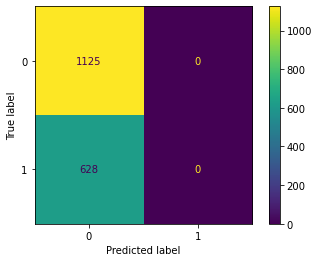

In [16]:
from sklearn.naive_bayes import GaussianNB
nb= GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb= nb.predict(X_test)
y_pred_prob_nb= nb.predict_proba(X_test)[:,1]

cm= confusion_matrix(y_test, y_pred_nb, labels= nb.classes_)
print(classification_report(y_test, y_pred_nb, zero_division=0))
print('Precision:', precision_score(y_test, y_pred_nb, zero_division=0))
print('Accuracy:', accuracy_score(y_test, y_pred_nb))
print('AUC:', roc_auc_score(y_test, y_pred_prob_nb))
dcm_nb= ConfusionMatrixDisplay(cm, display_labels= nb.classes_)
dcm_nb.plot()

--- SVM ---

              precision    recall  f1-score   support

           0       0.64      1.00      0.78      1125
           1       0.00      0.00      0.00       628

    accuracy                           0.64      1753
   macro avg       0.32      0.50      0.39      1753
weighted avg       0.41      0.64      0.50      1753

Precision: 0.0
Accuracy: 0.6411865373645179
AUC: 0.48940552016985134


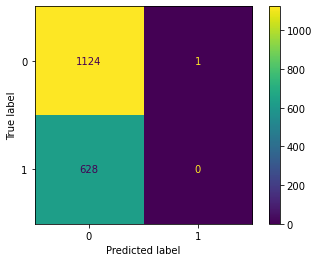

In [17]:
from sklearn.svm import SVC
svc= SVC(kernel= 'rbf', gamma= 1, probability=True, random_state=15)
svc.fit(X_train, y_train)
y_pred_svc= svc.predict(X_test)
y_pred_prob_svc= svc.predict_proba(X_test)[:,1]

cm= confusion_matrix(y_test, y_pred_svc, labels= svc.classes_)
print(classification_report(y_test, y_pred_svc, zero_division=0))
print('Precision:', precision_score(y_test, y_pred_svc, zero_division=0))
print('Accuracy:', accuracy_score(y_test, y_pred_svc))
print('AUC:', roc_auc_score(y_test, y_pred_prob_svc))
dcm_svc= ConfusionMatrixDisplay(cm, display_labels= svc.classes_)
dcm_svc.plot()

--- Random Forest ---

In [18]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(random_state=15)
rf.fit(X_train, y_train)
y_pred_rf= rf.predict(X_test)
y_pred_prob_rf= rf.predict_proba(X_test)[:,1]

              precision    recall  f1-score   support

           0       0.64      0.97      0.77      1125
           1       0.26      0.02      0.04       628

    accuracy                           0.63      1753
   macro avg       0.45      0.49      0.40      1753
weighted avg       0.50      0.63      0.51      1753

Precision: 0.2641509433962264
Accuracy: 0.6274957216200798
AUC: 0.49828945506015565


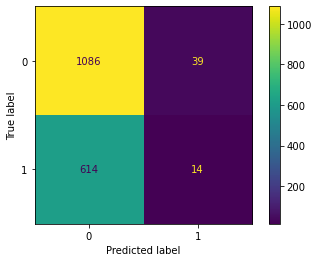

In [19]:
cm= confusion_matrix(y_test, y_pred_rf, labels= rf.classes_)
print(classification_report(y_test, y_pred_rf, zero_division=0))
print('Precision:', precision_score(y_test, y_pred_rf, zero_division=0))
print('Accuracy:', accuracy_score(y_test, y_pred_rf))
print('AUC:', roc_auc_score(y_test, y_pred_prob_rf))
dcm_rf= ConfusionMatrixDisplay(cm, display_labels= rf.classes_)
dcm_rf.plot()

In [20]:
param_grid= {
             'n_estimators': [100, 200, 300],
             'max_depth': [None, 10, 20, 30],
             'min_samples_split': [2, 5, 10],
             'min_samples_leaf': [1, 2, 4],
            }

gs_tuned_rf= GridSearchCV(estimator= rf, param_grid= param_grid, cv= 5, scoring= 'precision', n_jobs= -1, verbose= 2)
gs_tuned_rf.fit(X_train, y_train)
print("Best Parameters:", gs_tuned_rf.best_params_)
print("Best Precision Score:", gs_tuned_rf.best_score_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}
Best Precision Score: 0.6357142857142858


              precision    recall  f1-score   support

           0       0.64      1.00      0.78      1125
           1       0.20      0.00      0.00       628

    accuracy                           0.64      1753
   macro avg       0.42      0.50      0.39      1753
weighted avg       0.48      0.64      0.50      1753

Precision: 0.2
Accuracy: 0.6400456360524814
AUC: 0.5157013446567587


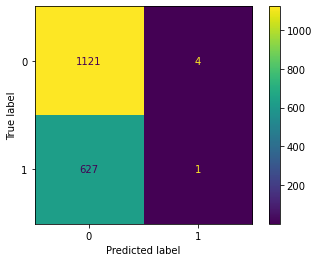

In [21]:
tuned_rf= gs_tuned_rf.best_estimator_
y_pred_tuned_rf= tuned_rf.predict(X_test)
y_pred_prob_tuned_rf= tuned_rf.predict_proba(X_test)[:,1]

cm= confusion_matrix(y_test, y_pred_tuned_rf, labels= tuned_rf.classes_)
print(classification_report(y_test, y_pred_tuned_rf, zero_division=0))
print('Precision:', precision_score(y_test, y_pred_tuned_rf, zero_division=0))
print('Accuracy:', accuracy_score(y_test, y_pred_tuned_rf))
print('AUC:', roc_auc_score(y_test, y_pred_prob_tuned_rf))
dcm_tuned_rf= ConfusionMatrixDisplay(cm, display_labels= tuned_rf.classes_)
dcm_tuned_rf.plot()

--- AdaBoost ---

In [22]:
from sklearn.ensemble import AdaBoostClassifier
ada= AdaBoostClassifier(random_state=15)
ada.fit(X_train, y_train)
y_pred_ada= ada.predict(X_test)
y_pred_prob_ada= ada.predict_proba(X_test)[:,1]

              precision    recall  f1-score   support

           0       0.64      0.99      0.78      1125
           1       0.32      0.01      0.02       628

    accuracy                           0.64      1753
   macro avg       0.48      0.50      0.40      1753
weighted avg       0.52      0.64      0.51      1753

Precision: 0.3157894736842105
Accuracy: 0.6377638334284085
AUC: 0.49759660297239916


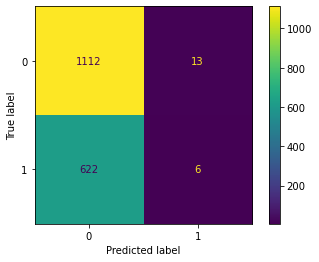

In [23]:
cm= confusion_matrix(y_test, y_pred_ada, labels= ada.classes_)
print(classification_report(y_test, y_pred_ada, zero_division=0))
print('Precision:', precision_score(y_test, y_pred_ada, zero_division=0))
print('Accuracy:', accuracy_score(y_test, y_pred_ada))
print('AUC:', roc_auc_score(y_test, y_pred_prob_ada))
dcm_ada= ConfusionMatrixDisplay(cm, display_labels= ada.classes_)
dcm_ada.plot()

In [24]:
param_grid= {'n_estimators': [50, 100, 200]}

gs_ada= GridSearchCV(estimator= ada, param_grid= param_grid, cv= 5, scoring= 'precision', n_jobs= -1, verbose= 2)
gs_ada.fit(X_train, y_train)
print("Best Parameters:", gs_ada.best_params_)
print("Best Precision Score:", gs_ada.best_score_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best Parameters: {'n_estimators': 100}
Best Precision Score: 0.44237805828268667


              precision    recall  f1-score   support

           0       0.64      0.99      0.78      1125
           1       0.50      0.02      0.05       628

    accuracy                           0.64      1753
   macro avg       0.57      0.51      0.41      1753
weighted avg       0.59      0.64      0.52      1753

Precision: 0.5
Accuracy: 0.6417569880205363
AUC: 0.49360368011323424


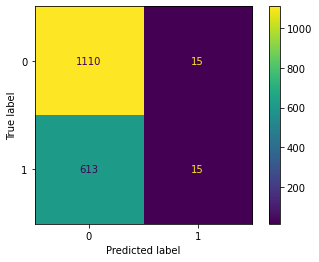

In [25]:
tuned_ada= gs_ada.best_estimator_
y_pred_tuned_ada= tuned_ada.predict(X_test)
y_pred_prob_tuned_ada= tuned_ada.predict_proba(X_test)[:,1]

cm= confusion_matrix(y_test, y_pred_tuned_ada, labels= tuned_ada.classes_)
print(classification_report(y_test, y_pred_tuned_ada, zero_division=0))
print('Precision:', precision_score(y_test, y_pred_tuned_ada, zero_division=0))
print('Accuracy:', accuracy_score(y_test, y_pred_tuned_ada))
print('AUC:', roc_auc_score(y_test, y_pred_prob_tuned_ada))
dcm_tuned_ada= ConfusionMatrixDisplay(cm, display_labels= tuned_ada.classes_)
dcm_tuned_ada.plot()

--- GradientBoosting ---

              precision    recall  f1-score   support

           0       0.64      0.98      0.77      1125
           1       0.19      0.01      0.02       628

    accuracy                           0.63      1753
   macro avg       0.42      0.49      0.40      1753
weighted avg       0.48      0.63      0.50      1753

Precision: 0.1935483870967742
Accuracy: 0.6309184255561894
AUC: 0.498418966737438


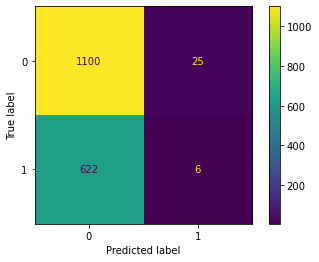

In [26]:
from sklearn.ensemble import GradientBoostingClassifier
grb= GradientBoostingClassifier(random_state=15)
grb.fit(X_train, y_train)
y_pred_grb= grb.predict(X_test)
y_pred_prob_grb= grb.predict_proba(X_test)[:,1]

cm= confusion_matrix(y_test, y_pred_grb, labels= grb.classes_)
print(classification_report(y_test, y_pred_grb, zero_division=0))
print('Precision:', precision_score(y_test, y_pred_grb, zero_division=0))
print('Accuracy:', accuracy_score(y_test, y_pred_grb))
print('AUC:', roc_auc_score(y_test, y_pred_prob_grb))
dcm_grb= ConfusionMatrixDisplay(cm, display_labels= grb.classes_)
dcm_grb.plot()

In [27]:
param_grid= {'learning_rate': [0.01, 0.1, 0.2]}

gs_grb= GridSearchCV(estimator= grb, param_grid= param_grid, cv= 5, scoring= 'precision', n_jobs= -1, verbose= 2)
gs_grb.fit(X_train, y_train)

print("Best Parameters:", gs_grb.best_params_)
print("Best Precision Score:", gs_grb.best_score_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best Parameters: {'learning_rate': 0.2}
Best Precision Score: 0.39370162782601725


              precision    recall  f1-score   support

           0       0.64      0.95      0.77      1125
           1       0.38      0.06      0.10       628

    accuracy                           0.63      1753
   macro avg       0.51      0.50      0.43      1753
weighted avg       0.55      0.63      0.53      1753

Precision: 0.37894736842105264
Accuracy: 0.6286366229321164
AUC: 0.5034069355980184


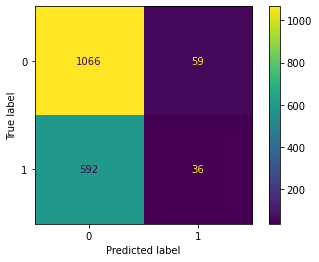

In [28]:
tuned_grb= gs_grb.best_estimator_
y_pred_tuned_grb= tuned_grb.predict(X_test)
y_pred_prob_tuned_grb= tuned_grb.predict_proba(X_test)[:,1]

cm= confusion_matrix(y_test, y_pred_tuned_grb, labels= tuned_grb.classes_)
print(classification_report(y_test, y_pred_tuned_grb, zero_division=0))
print('Precision:', precision_score(y_test, y_pred_tuned_grb, zero_division=0))
print('Accuracy:', accuracy_score(y_test, y_pred_tuned_grb))
print('AUC:', roc_auc_score(y_test, y_pred_prob_tuned_grb))
dcm_tuned_grb= ConfusionMatrixDisplay(cm, display_labels= tuned_grb.classes_)
dcm_tuned_grb.plot()

--- XGB ---

              precision    recall  f1-score   support

           0       0.65      0.78      0.71      1125
           1       0.39      0.25      0.30       628

    accuracy                           0.59      1753
   macro avg       0.52      0.52      0.51      1753
weighted avg       0.56      0.59      0.56      1753

Precision: 0.3886138613861386
Accuracy: 0.5904164289788933
AUC: 0.5259179051663128


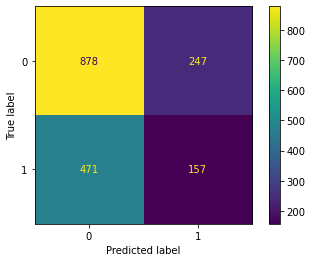

In [29]:
from xgboost import XGBClassifier
xgb= XGBClassifier(random_state=15)
xgb.fit(X_train, y_train)
y_pred_xgb= xgb.predict(X_test)
y_pred_prob_xgb= xgb.predict_proba(X_test)[:,1]

cm= confusion_matrix(y_test, y_pred_xgb, labels= xgb.classes_)
print(classification_report(y_test, y_pred_xgb, zero_division=0))
print('Precision:', precision_score(y_test, y_pred_xgb, zero_division=0))
print('Accuracy:', accuracy_score(y_test, y_pred_xgb))
print('AUC:', roc_auc_score(y_test, y_pred_prob_xgb))
dcm_xgb= ConfusionMatrixDisplay(cm, display_labels= xgb.classes_)
dcm_xgb.plot()

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best Parameters: {'learning_rate': 0.1}
Best Precision Score: 0.4058648077035296
              precision    recall  f1-score   support

           0       0.64      0.89      0.74      1125
           1       0.34      0.10      0.15       628

    accuracy                           0.61      1753
   macro avg       0.49      0.49      0.45      1753
weighted avg       0.53      0.61      0.53      1753

Precision: 0.3351063829787234
Accuracy: 0.6063890473474044
AUC: 0.5133531493276716


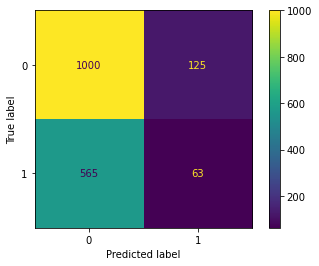

In [30]:
params_XGBoost= {'learning_rate': [0.01, 0.1, 1.0]}

gs_xgb= GridSearchCV(estimator= xgb, param_grid= params_XGBoost, cv= 5, scoring= 'precision', n_jobs= -1, verbose= 2)
gs_xgb.fit(X_train, y_train)

print("Best Parameters:", gs_xgb.best_params_)
print("Best Precision Score:", gs_xgb.best_score_)

tuned_xgb= gs_xgb.best_estimator_
y_pred_tuned_xgb= tuned_xgb.predict(X_test)
y_pred_prob_tuned_xgb= tuned_xgb.predict_proba(X_test)[:,1]


cm= confusion_matrix(y_test, y_pred_tuned_xgb, labels= tuned_xgb.classes_)
print(classification_report(y_test, y_pred_tuned_xgb, zero_division=0))
print('Precision:', precision_score(y_test, y_pred_tuned_xgb, zero_division=0))
print('Accuracy:', accuracy_score(y_test, y_pred_tuned_xgb))
print('AUC:', roc_auc_score(y_test, y_pred_prob_tuned_xgb))
dcm_tuned_xgb= ConfusionMatrixDisplay(cm, display_labels= tuned_xgb.classes_)
dcm_tuned_xgb.plot()

--- LGBM ---

[LightGBM] [Info] Number of positive: 2511, number of negative: 4499
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.106042 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1145
[LightGBM] [Info] Number of data points in the train set: 7010, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.358203 -> initscore=-0.583174
[LightGBM] [Info] Start training from score -0.583174
              precision    recall  f1-score   support

           0       0.64      0.91      0.75      1125
           1       0.29      0.07      0.11       628

    accuracy                           0.61      1753
   macro avg       0.46      0.49      0.43      1753
weighted avg       0.51      0.61      0.52      1753

Precision: 0.29285714285714287
Accuracy: 0.6086708499714775
AUC: 0.5138655343241331


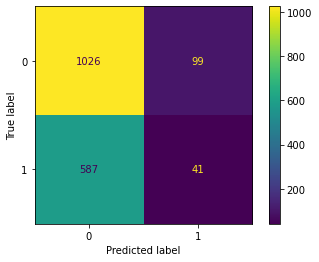

In [31]:
from lightgbm import LGBMClassifier
lgm= LGBMClassifier(random_state=15)
lgm.fit(X_train, y_train)
y_pred_lgm= lgm.predict(X_test)
y_pred_prob_lgm= lgm.predict_proba(X_test)[:,1]


cm= confusion_matrix(y_test, y_pred_lgm, labels= lgm.classes_)
print(classification_report(y_test, y_pred_lgm, zero_division=0))
print('Precision:', precision_score(y_test, y_pred_lgm, zero_division=0))
print('Accuracy:', accuracy_score(y_test, y_pred_lgm))
print('AUC:', roc_auc_score(y_test, y_pred_prob_lgm))
dcm_lgm= ConfusionMatrixDisplay(cm, display_labels= lgm.classes_)
dcm_lgm.plot()

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Info] Number of positive: 2511, number of negative: 4499
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006662 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1145
[LightGBM] [Info] Number of data points in the train set: 7010, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.358203 -> initscore=-0.583174
[LightGBM] [Info] Start training from score -0.583174
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

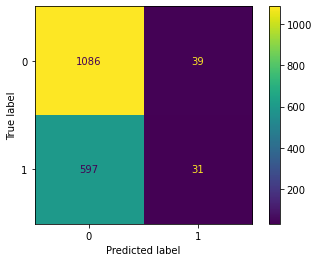

In [32]:
params_LGB= {'learning_rate': [0.001, 0.01, 0.1, 1.0],
             'num_leaves': [31, 127],
             'reg_alpha': [0.1, 0.5],
             'min_data_in_leaf': [30, 50, 100, 300, 400]}

gs_lgm= GridSearchCV(estimator= lgm, param_grid= params_LGB, cv=5, scoring='precision', n_jobs=-1, verbose=2)
gs_lgm.fit(X_train, y_train)

print("Best Parameters:", gs_lgm.best_params_)
print("Best Precision Score:", gs_lgm.best_score_)

tuned_lgm= gs_lgm.best_estimator_
y_pred_tuned_lgm= tuned_lgm.predict(X_test)
y_pred_prob_tuned_lgm= tuned_lgm.predict_proba(X_test)[:,1]


cm= confusion_matrix(y_test, y_pred_tuned_lgm, labels= tuned_lgm.classes_)
print(classification_report(y_test, y_pred_tuned_lgm, zero_division=0))
print('Precision:', precision_score(y_test, y_pred_tuned_lgm, zero_division=0))
print('Accuracy:', accuracy_score(y_test, y_pred_tuned_lgm))
print('AUC:', roc_auc_score(y_test, y_pred_prob_tuned_lgm))
dcm_tuned_lgm= ConfusionMatrixDisplay(cm, display_labels= tuned_lgm.classes_)
dcm_tuned_lgm.plot()

--- CatBoost ---

Learning rate set to 0.023662
0:	learn: 0.6909748	total: 154ms	remaining: 2m 33s
1:	learn: 0.6889101	total: 161ms	remaining: 1m 20s
2:	learn: 0.6869269	total: 169ms	remaining: 56.3s
3:	learn: 0.6850353	total: 178ms	remaining: 44.3s
4:	learn: 0.6831982	total: 191ms	remaining: 38s
5:	learn: 0.6814262	total: 204ms	remaining: 33.8s
6:	learn: 0.6797913	total: 213ms	remaining: 30.3s
7:	learn: 0.6781598	total: 220ms	remaining: 27.3s
8:	learn: 0.6767292	total: 227ms	remaining: 25s
9:	learn: 0.6753181	total: 236ms	remaining: 23.3s
10:	learn: 0.6738960	total: 243ms	remaining: 21.8s
11:	learn: 0.6725408	total: 252ms	remaining: 20.7s
12:	learn: 0.6713718	total: 259ms	remaining: 19.7s
13:	learn: 0.6701016	total: 267ms	remaining: 18.8s
14:	learn: 0.6689999	total: 277ms	remaining: 18.2s
15:	learn: 0.6679177	total: 285ms	remaining: 17.5s
16:	learn: 0.6667808	total: 294ms	remaining: 17s
17:	learn: 0.6658232	total: 302ms	remaining: 16.5s
18:	learn: 0.6646794	total: 311ms	remaining: 16s
19:	learn: 0.6636

176:	learn: 0.6133047	total: 1.67s	remaining: 7.75s
177:	learn: 0.6131295	total: 1.68s	remaining: 7.75s
178:	learn: 0.6129494	total: 1.69s	remaining: 7.75s
179:	learn: 0.6127884	total: 1.7s	remaining: 7.73s
180:	learn: 0.6126641	total: 1.71s	remaining: 7.73s
181:	learn: 0.6123609	total: 1.72s	remaining: 7.71s
182:	learn: 0.6121765	total: 1.72s	remaining: 7.7s
183:	learn: 0.6120022	total: 1.73s	remaining: 7.68s
184:	learn: 0.6118379	total: 1.74s	remaining: 7.66s
185:	learn: 0.6115786	total: 1.75s	remaining: 7.65s
186:	learn: 0.6113336	total: 1.76s	remaining: 7.64s
187:	learn: 0.6111988	total: 1.76s	remaining: 7.62s
188:	learn: 0.6109130	total: 1.77s	remaining: 7.62s
189:	learn: 0.6107318	total: 1.78s	remaining: 7.6s
190:	learn: 0.6105035	total: 1.79s	remaining: 7.58s
191:	learn: 0.6102428	total: 1.8s	remaining: 7.56s
192:	learn: 0.6100751	total: 1.8s	remaining: 7.55s
193:	learn: 0.6099424	total: 1.81s	remaining: 7.53s
194:	learn: 0.6096470	total: 1.82s	remaining: 7.52s
195:	learn: 0.609

350:	learn: 0.5777526	total: 3.15s	remaining: 5.82s
351:	learn: 0.5776190	total: 3.16s	remaining: 5.82s
352:	learn: 0.5774604	total: 3.17s	remaining: 5.81s
353:	learn: 0.5772092	total: 3.18s	remaining: 5.8s
354:	learn: 0.5769573	total: 3.19s	remaining: 5.79s
355:	learn: 0.5768465	total: 3.19s	remaining: 5.78s
356:	learn: 0.5766689	total: 3.2s	remaining: 5.77s
357:	learn: 0.5764610	total: 3.21s	remaining: 5.76s
358:	learn: 0.5762896	total: 3.22s	remaining: 5.75s
359:	learn: 0.5760797	total: 3.23s	remaining: 5.74s
360:	learn: 0.5758731	total: 3.23s	remaining: 5.72s
361:	learn: 0.5757227	total: 3.24s	remaining: 5.71s
362:	learn: 0.5754496	total: 3.25s	remaining: 5.71s
363:	learn: 0.5752441	total: 3.26s	remaining: 5.69s
364:	learn: 0.5750575	total: 3.27s	remaining: 5.68s
365:	learn: 0.5747949	total: 3.28s	remaining: 5.67s
366:	learn: 0.5745446	total: 3.29s	remaining: 5.67s
367:	learn: 0.5743473	total: 3.29s	remaining: 5.66s
368:	learn: 0.5741047	total: 3.3s	remaining: 5.65s
369:	learn: 0.5

529:	learn: 0.5399711	total: 4.65s	remaining: 4.12s
530:	learn: 0.5398140	total: 4.66s	remaining: 4.11s
531:	learn: 0.5396022	total: 4.66s	remaining: 4.1s
532:	learn: 0.5393752	total: 4.67s	remaining: 4.09s
533:	learn: 0.5391765	total: 4.68s	remaining: 4.08s
534:	learn: 0.5389771	total: 4.69s	remaining: 4.07s
535:	learn: 0.5387687	total: 4.7s	remaining: 4.07s
536:	learn: 0.5385311	total: 4.7s	remaining: 4.06s
537:	learn: 0.5383280	total: 4.71s	remaining: 4.05s
538:	learn: 0.5381641	total: 4.72s	remaining: 4.04s
539:	learn: 0.5379798	total: 4.73s	remaining: 4.03s
540:	learn: 0.5377498	total: 4.73s	remaining: 4.02s
541:	learn: 0.5375167	total: 4.74s	remaining: 4.01s
542:	learn: 0.5372504	total: 4.75s	remaining: 4s
543:	learn: 0.5370965	total: 4.76s	remaining: 3.99s
544:	learn: 0.5369244	total: 4.76s	remaining: 3.98s
545:	learn: 0.5366897	total: 4.77s	remaining: 3.97s
546:	learn: 0.5364407	total: 4.78s	remaining: 3.96s
547:	learn: 0.5361875	total: 4.79s	remaining: 3.95s
548:	learn: 0.5359

707:	learn: 0.5049204	total: 6.14s	remaining: 2.53s
708:	learn: 0.5047588	total: 6.15s	remaining: 2.52s
709:	learn: 0.5045285	total: 6.16s	remaining: 2.52s
710:	learn: 0.5043534	total: 6.17s	remaining: 2.51s
711:	learn: 0.5041083	total: 6.17s	remaining: 2.5s
712:	learn: 0.5039363	total: 6.18s	remaining: 2.49s
713:	learn: 0.5037759	total: 6.19s	remaining: 2.48s
714:	learn: 0.5036269	total: 6.2s	remaining: 2.47s
715:	learn: 0.5034435	total: 6.21s	remaining: 2.46s
716:	learn: 0.5032306	total: 6.21s	remaining: 2.45s
717:	learn: 0.5029722	total: 6.22s	remaining: 2.44s
718:	learn: 0.5028654	total: 6.23s	remaining: 2.44s
719:	learn: 0.5027286	total: 6.24s	remaining: 2.43s
720:	learn: 0.5025301	total: 6.25s	remaining: 2.42s
721:	learn: 0.5023597	total: 6.26s	remaining: 2.41s
722:	learn: 0.5022523	total: 6.26s	remaining: 2.4s
723:	learn: 0.5020421	total: 6.27s	remaining: 2.39s
724:	learn: 0.5018389	total: 6.28s	remaining: 2.38s
725:	learn: 0.5016490	total: 6.29s	remaining: 2.37s
726:	learn: 0.5

883:	learn: 0.4745555	total: 7.61s	remaining: 998ms
884:	learn: 0.4744020	total: 7.62s	remaining: 990ms
885:	learn: 0.4742941	total: 7.63s	remaining: 981ms
886:	learn: 0.4741444	total: 7.63s	remaining: 973ms
887:	learn: 0.4739567	total: 7.64s	remaining: 964ms
888:	learn: 0.4738631	total: 7.65s	remaining: 955ms
889:	learn: 0.4737379	total: 7.66s	remaining: 946ms
890:	learn: 0.4735541	total: 7.66s	remaining: 937ms
891:	learn: 0.4733753	total: 7.67s	remaining: 929ms
892:	learn: 0.4732595	total: 7.68s	remaining: 920ms
893:	learn: 0.4731037	total: 7.69s	remaining: 912ms
894:	learn: 0.4729218	total: 7.7s	remaining: 903ms
895:	learn: 0.4727374	total: 7.7s	remaining: 894ms
896:	learn: 0.4725555	total: 7.71s	remaining: 885ms
897:	learn: 0.4724689	total: 7.72s	remaining: 877ms
898:	learn: 0.4722803	total: 7.72s	remaining: 868ms
899:	learn: 0.4721453	total: 7.73s	remaining: 859ms
900:	learn: 0.4720218	total: 7.74s	remaining: 851ms
901:	learn: 0.4718089	total: 7.75s	remaining: 842ms
902:	learn: 0.

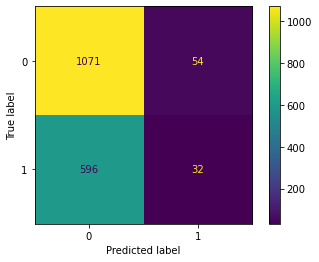

In [33]:
from catboost import CatBoostClassifier
cat= CatBoostClassifier(random_state=15)
cat.fit(X_train, y_train)
y_pred_cat= cat.predict(X_test)
y_pred_prob_cat= cat.predict_proba(X_test)[:,1]

cm= confusion_matrix(y_test, y_pred_cat, labels= cat.classes_)
print(classification_report(y_test, y_pred_cat, zero_division=0))
print('Precision:', precision_score(y_test, y_pred_cat, zero_division=0))
print('Accuracy:', accuracy_score(y_test, y_pred_cat))
print('AUC:', roc_auc_score(y_test, y_pred_prob_cat))
dcm_cat= ConfusionMatrixDisplay(cm, display_labels= cat.classes_)
dcm_cat.plot()

Fitting 5 folds for each of 36 candidates, totalling 180 fits
0:	learn: 0.6851452	total: 6.8ms	remaining: 674ms
1:	learn: 0.6787267	total: 12.9ms	remaining: 632ms
2:	learn: 0.6734260	total: 20.3ms	remaining: 657ms
3:	learn: 0.6690385	total: 26.9ms	remaining: 646ms
4:	learn: 0.6655928	total: 35.5ms	remaining: 675ms
5:	learn: 0.6627958	total: 42ms	remaining: 658ms
6:	learn: 0.6606123	total: 48.6ms	remaining: 645ms
7:	learn: 0.6587929	total: 53.8ms	remaining: 619ms
8:	learn: 0.6573277	total: 58.8ms	remaining: 594ms
9:	learn: 0.6561622	total: 63.7ms	remaining: 573ms
10:	learn: 0.6551129	total: 70.1ms	remaining: 567ms
11:	learn: 0.6542719	total: 76.5ms	remaining: 561ms
12:	learn: 0.6534173	total: 82ms	remaining: 549ms
13:	learn: 0.6526899	total: 87.5ms	remaining: 537ms
14:	learn: 0.6521925	total: 93.5ms	remaining: 530ms
15:	learn: 0.6517963	total: 98.9ms	remaining: 519ms
16:	learn: 0.6514551	total: 105ms	remaining: 511ms
17:	learn: 0.6510748	total: 110ms	remaining: 503ms
18:	learn: 0.650814

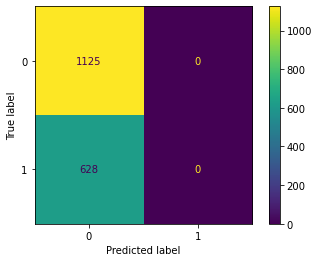

In [34]:
params_CatBoost= {
                  'depth': [3,5,10],
                  'learning_rate' : [0.01,0.1,1],
                  'iterations' : [5,10,50,100]
                 }

gs_cat= GridSearchCV(estimator= cat, param_grid= params_CatBoost, cv=5, scoring='precision', n_jobs=-1, verbose=2)
gs_cat.fit(X_train, y_train)

print("Best Parameters:", gs_cat.best_params_)
print("Best Precision Score:", gs_cat.best_score_)

tuned_cat= gs_cat.best_estimator_
y_pred_tuned_cat= tuned_cat.predict(X_test)
y_pred_prob_tuned_cat= tuned_cat.predict_proba(X_test)[:,1]

cm= confusion_matrix(y_test, y_pred_tuned_cat, labels= tuned_cat.classes_)
print(classification_report(y_test, y_pred_tuned_cat, zero_division=0))
print('Precision:', precision_score(y_test, y_pred_tuned_cat, zero_division=0))
print('Accuracy:', accuracy_score(y_test, y_pred_tuned_cat))
print('AUC:', roc_auc_score(y_test, y_pred_prob_tuned_cat))
dcm_tuned_cat= ConfusionMatrixDisplay(cm, display_labels= tuned_cat.classes_)
dcm_tuned_cat.plot()

In [35]:
from pycaret.classification import *
s= setup(df, target = 'Heart Attack Risk')

,Description,Value
0,Session id,4355
1,Target,Heart Attack Risk
2,Target type,Binary
3,Original data shape,"(8763, 23)"
4,Transformed data shape,"(8763, 23)"
5,Transformed train set shape,"(6134, 23)"
6,Transformed test set shape,"(2629, 23)"
7,Numeric features,22
8,Preprocess,True
9,Imputation type,simple


In [36]:
best_model= compare_models(sort='Precision')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.6382,0.5090,0.0268,0.4395,0.0503,0.0079,0.0225,0.3070
catboost,CatBoost Classifier,0.6311,0.5197,0.0587,0.3955,0.1022,0.0113,0.0191,2.5260
lightgbm,Light Gradient Boosting Machine,0.6192,0.5114,0.1134,0.3872,0.1751,0.0174,0.0221,1.2130
gbc,Gradient Boosting Classifier,0.6350,0.5188,0.0310,0.3761,0.0570,0.0038,0.0075,0.8770
qda,Quadratic Discriminant Analysis,0.6180,0.5116,0.0947,0.3736,0.1506,0.0058,0.0090,0.0420
xgboost,Extreme Gradient Boosting,0.5853,0.5101,0.2189,0.3673,0.2743,0.0094,0.0100,1.3230
et,Extra Trees Classifier,0.6347,0.4897,0.0259,0.3635,0.0484,0.0004,0.0014,0.8690
dt,Decision Tree Classifier,0.5360,0.4990,0.3682,0.3573,0.3621,-0.0019,-0.0019,0.0590
rf,Random Forest Classifier,0.6325,0.5048,0.0287,0.3485,0.0528,-0.0022,-0.0043,0.5180
knn,K Neighbors Classifier,0.5626,0.4980,0.2303,0.3388,0.2739,-0.0231,-0.0238,0.1300


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [37]:
print(best_model)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator='deprecated',
                   estimator=None, learning_rate=1.0, n_estimators=50,
                   random_state=4355)


In [38]:
tuned_best_model = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6417,0.4925,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.6417,0.4613,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.6417,0.5055,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.6401,0.4976,0.0000,0.0000,0.0000,-0.0033,-0.0302
4,0.6427,0.4706,0.0091,0.6667,0.0179,0.0084,0.0450
5,0.6411,0.5441,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.6395,0.4749,0.0000,0.0000,0.0000,-0.0033,-0.0302
7,0.6427,0.5031,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.6444,0.5482,0.0046,1.0000,0.0091,0.0059,0.0542


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


--- Visualisation ---

In [39]:
print('Logistic Regression Precision:', precision_score(y_test, y_pred_lr, zero_division= 0))
print('Decision Tree Precision:', precision_score(y_test, y_pred_dt, zero_division= 0))
print('Tuned Decision Tree Precision:', precision_score(y_test, y_pred_tuned_dt, zero_division= 0))
print('KNeighborsClassifier Precision:', precision_score(y_test, y_pred_knn, zero_division= 0))
print('Tuned KNeighborsClassifier Precision:', precision_score(y_test, y_pred_tuned_knn, zero_division= 0))
print('GaussianNB Precision:', precision_score(y_test, y_pred_nb, zero_division= 0))
print('SVM Precision:', precision_score(y_test, y_pred_svc, zero_division= 0))
print('Random Forest Precision:', precision_score(y_test, y_pred_rf, zero_division= 0))
print('Tuned Random Forest Precision:', precision_score(y_test, y_pred_tuned_rf, zero_division= 0))
print('AdaBoost Precision:', precision_score(y_test, y_pred_ada, zero_division= 0))
print('Tuned AdaBoost Precision:', precision_score(y_test, y_pred_tuned_ada, zero_division= 0))
print('GradientBoosting Precision:', precision_score(y_test, y_pred_grb, zero_division= 0))
print('Tuned GradientBoosting Precision:', precision_score(y_test, y_pred_tuned_grb, zero_division= 0))
print('XGB Precision:', precision_score(y_test, y_pred_xgb, zero_division= 0))
print('Tuned XGB Precision:', precision_score(y_test, y_pred_tuned_xgb, zero_division= 0))
print('LGBM Precision:', precision_score(y_test, y_pred_lgm, zero_division= 0))
print('Tuned LGBM Precision:', precision_score(y_test, y_pred_tuned_lgm, zero_division= 0))
print('CatBoost Precision:', precision_score(y_test, y_pred_cat, zero_division= 0))
print('Tuned CatBoost Precision:', precision_score(y_test, y_pred_tuned_cat, zero_division= 0))

Logistic Regression Precision: 0.0
Decision Tree Precision: 0.3605769230769231
Tuned Decision Tree Precision: 0.2975609756097561
KNeighborsClassifier Precision: 0.3470319634703196
Tuned KNeighborsClassifier Precision: 0.3404255319148936
GaussianNB Precision: 0.0
SVM Precision: 0.0
Random Forest Precision: 0.2641509433962264
Tuned Random Forest Precision: 0.2
AdaBoost Precision: 0.3157894736842105
Tuned AdaBoost Precision: 0.5
GradientBoosting Precision: 0.1935483870967742
Tuned GradientBoosting Precision: 0.37894736842105264
XGB Precision: 0.3886138613861386
Tuned XGB Precision: 0.3351063829787234
LGBM Precision: 0.29285714285714287
Tuned LGBM Precision: 0.44285714285714284
CatBoost Precision: 0.37209302325581395
Tuned CatBoost Precision: 0.0


In [40]:
precision_scores= {
                    'Logistic Regression Precision:': precision_score(y_test, y_pred_lr, zero_division= 0),
                    'Decision Tree Precision:': precision_score(y_test, y_pred_dt, zero_division= 0),
                    'Tuned Decision Tree Precision:': precision_score(y_test, y_pred_tuned_dt, zero_division= 0),
                    'KNeighborsClassifier Precision:': precision_score(y_test, y_pred_knn, zero_division= 0),
                    'Tuned KNeighborsClassifier Precision:': precision_score(y_test, y_pred_tuned_knn, zero_division= 0),
                    'GaussianNB Precision:': precision_score(y_test, y_pred_nb, zero_division= 0),
                    'SVM Precision:': precision_score(y_test, y_pred_svc, zero_division= 0),
                    'Random Forest Precision:': precision_score(y_test, y_pred_rf, zero_division= 0),
                    'Tuned Random Forest Precision:': precision_score(y_test, y_pred_tuned_rf, zero_division= 0),
                    'AdaBoost Precision:': precision_score(y_test, y_pred_ada, zero_division= 0),
                    'Tuned AdaBoost Precision:': precision_score(y_test, y_pred_tuned_ada, zero_division= 0),
                    'GradientBoosting Precision:': precision_score(y_test, y_pred_grb, zero_division= 0),
                    'Tuned GradientBoosting Precision:': precision_score(y_test, y_pred_tuned_grb, zero_division= 0),
                    'XGB Precision:': precision_score(y_test, y_pred_xgb, zero_division= 0),
                    'Tuned XGB Precision:': precision_score(y_test, y_pred_tuned_xgb, zero_division= 0),
                    'LGBM Precision:': precision_score(y_test, y_pred_lgm, zero_division= 0),
                    'Tuned LGBM Precision:': precision_score(y_test, y_pred_tuned_lgm, zero_division= 0),
                    'CatBoost Precision:': precision_score(y_test, y_pred_cat, zero_division= 0),
                    'Tuned CatBoost Precision:': precision_score(y_test, y_pred_tuned_cat, zero_division= 0)
                  }

ml_precision= pd.DataFrame(list(precision_scores.items()), columns= ['Model', 'Precision Score'])
ml_precision= ml_precision.sort_values(by= 'Precision Score', ascending=False)
print(ml_precision)

                                    Model  Precision Score
10              Tuned AdaBoost Precision:         0.500000
16                  Tuned LGBM Precision:         0.442857
13                         XGB Precision:         0.388614
12      Tuned GradientBoosting Precision:         0.378947
17                    CatBoost Precision:         0.372093
1                Decision Tree Precision:         0.360577
3         KNeighborsClassifier Precision:         0.347032
4   Tuned KNeighborsClassifier Precision:         0.340426
14                   Tuned XGB Precision:         0.335106
9                     AdaBoost Precision:         0.315789
2          Tuned Decision Tree Precision:         0.297561
15                        LGBM Precision:         0.292857
7                Random Forest Precision:         0.264151
8          Tuned Random Forest Precision:         0.200000
11            GradientBoosting Precision:         0.193548
0          Logistic Regression Precision:         0.0000

In [41]:
accuracy_scores= {
                    'Logistic Regression Accuracy:': accuracy_score(y_test, y_pred_lr),
                    'Decision Tree Accuracy:': accuracy_score(y_test, y_pred_dt),
                    'Tuned Decision Tree Accuracy:': accuracy_score(y_test, y_pred_tuned_dt),
                    'KNeighborsClassifier Accuracy:': accuracy_score(y_test, y_pred_knn),
                    'Tuned KNeighborsClassifier Accuracy:': accuracy_score(y_test, y_pred_tuned_knn),
                    'GaussianNB Accuracy:': accuracy_score(y_test, y_pred_nb),
                    'SVM Accuracy:': accuracy_score(y_test, y_pred_svc),
                    'Random Forest Accuracy:': accuracy_score(y_test, y_pred_rf),
                    'Tuned Random Forest Accuracy:': accuracy_score(y_test, y_pred_tuned_rf),
                    'AdaBoost Accuracy:': accuracy_score(y_test, y_pred_ada),
                    'Tuned AdaBoost Accuracy:': accuracy_score(y_test, y_pred_tuned_ada),
                    'GradientBoosting Accuracy:': accuracy_score(y_test, y_pred_grb),
                    'Tuned GradientBoosting Accuracy:': accuracy_score(y_test, y_pred_tuned_grb),
                    'XGB Accuracy:': accuracy_score(y_test, y_pred_xgb),
                    'Tuned XGB Accuracy:': accuracy_score(y_test, y_pred_tuned_xgb),
                    'LGBM Accuracy:': accuracy_score(y_test, y_pred_lgm),
                    'Tuned LGBM Accuracy:': accuracy_score(y_test, y_pred_tuned_lgm),
                    'CatBoost Accuracy:': accuracy_score(y_test, y_pred_cat),
                    'Tuned CatBoost Accuracy:': accuracy_score(y_test, y_pred_tuned_cat)
                  }

ml_accuracy= pd.DataFrame(list(accuracy_scores.items()), columns= ['Model', 'Accuracy Score'])
ml_accuracy= ml_accuracy.sort_values(by= 'Accuracy Score', ascending=False)
print(ml_accuracy)

                                   Model  Accuracy Score
0          Logistic Regression Accuracy:        0.641757
5                   GaussianNB Accuracy:        0.641757
10              Tuned AdaBoost Accuracy:        0.641757
18              Tuned CatBoost Accuracy:        0.641757
6                          SVM Accuracy:        0.641187
8          Tuned Random Forest Accuracy:        0.640046
9                     AdaBoost Accuracy:        0.637764
16                  Tuned LGBM Accuracy:        0.637193
4   Tuned KNeighborsClassifier Accuracy:        0.633200
11            GradientBoosting Accuracy:        0.630918
17                    CatBoost Accuracy:        0.629207
12      Tuned GradientBoosting Accuracy:        0.628637
7                Random Forest Accuracy:        0.627496
15                        LGBM Accuracy:        0.608671
14                   Tuned XGB Accuracy:        0.606389
2          Tuned Decision Tree Accuracy:        0.594410
13                         XGB 

In [42]:
auc_scores= {
                    'Logistic Regression AUC:': roc_auc_score(y_test, y_pred_prob_lr),
                    'Decision Tree AUC:': roc_auc_score(y_test, y_pred_prob_dt),
                    'Tuned Decision Tree AUC:': roc_auc_score(y_test, y_pred_prob_tuned_dt),
                    'KNeighborsClassifier AUC:': roc_auc_score(y_test, y_pred_prob_knn),
                    'Tuned KNeighborsClassifier AUC:': roc_auc_score(y_test, y_pred_prob_tuned_knn),
                    'GaussianNB AUC:': roc_auc_score(y_test, y_pred_prob_nb),
                    'SVM AUC:': roc_auc_score(y_test, y_pred_prob_svc),
                    'Random Forest AUC:': roc_auc_score(y_test, y_pred_prob_rf),
                    'Tuned Random Forest AUC:': roc_auc_score(y_test, y_pred_prob_tuned_rf),
                    'AdaBoost AUC:': roc_auc_score(y_test, y_pred_prob_ada),
                    'Tuned AdaBoost AUC:': roc_auc_score(y_test, y_pred_prob_tuned_ada),
                    'GradientBoosting AUC:': roc_auc_score(y_test, y_pred_prob_grb),
                    'Tuned GradientBoosting AUC:': roc_auc_score(y_test, y_pred_prob_tuned_grb),
                    'XGB AUC:': roc_auc_score(y_test, y_pred_prob_xgb),
                    'Tuned XGB AUC:': roc_auc_score(y_test, y_pred_prob_tuned_xgb),
                    'LGBM AUC:': roc_auc_score(y_test, y_pred_prob_lgm),
                    'Tuned LGBM AUC:': roc_auc_score(y_test, y_pred_prob_tuned_lgm),
                    'CatBoost AUC:': roc_auc_score(y_test, y_pred_prob_cat),
                    'Tuned CatBoost AUC:': roc_auc_score(y_test, y_pred_prob_tuned_cat)
                  }

ml_auc= pd.DataFrame(list(auc_scores.items()), columns= ['Model', 'AUC Score'])
ml_auc= ml_auc.sort_values(by= 'AUC Score', ascending=False)
print(ml_auc)

                              Model  AUC Score
13                         XGB AUC:   0.525918
8          Tuned Random Forest AUC:   0.515701
15                        LGBM AUC:   0.513866
14                   Tuned XGB AUC:   0.513353
16                  Tuned LGBM AUC:   0.513333
17                    CatBoost AUC:   0.508906
4   Tuned KNeighborsClassifier AUC:   0.507252
12      Tuned GradientBoosting AUC:   0.503407
1                Decision Tree AUC:   0.501807
11            GradientBoosting AUC:   0.498419
7                Random Forest AUC:   0.498289
9                     AdaBoost AUC:   0.497597
18              Tuned CatBoost AUC:   0.494386
10              Tuned AdaBoost AUC:   0.493604
6                          SVM AUC:   0.489406
5                   GaussianNB AUC:   0.488579
2          Tuned Decision Tree AUC:   0.488514
0          Logistic Regression AUC:   0.482835
3         KNeighborsClassifier AUC:   0.482602


Logistic Regression Precision: 0.0
Decision Tree Precision: 0.3605769230769231
Tuned Decision Tree Precision: 0.2975609756097561


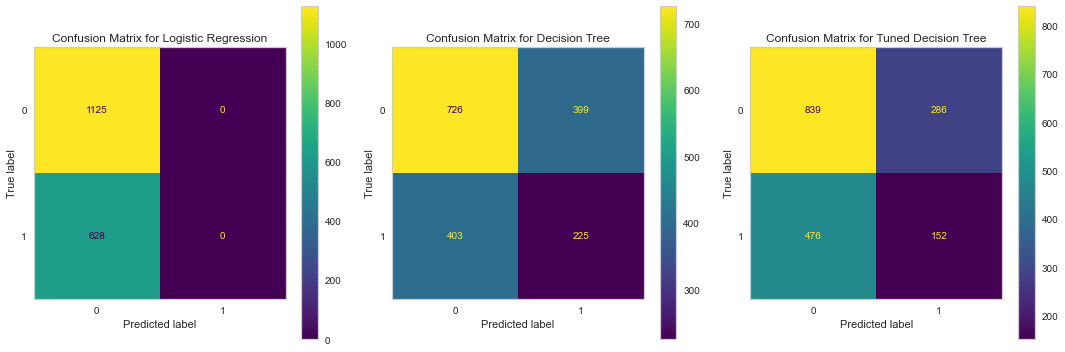

In [43]:
fig, axes= plt.subplots(1, 3, figsize= (15, 5))

print('Logistic Regression Precision:', precision_score(y_test, y_pred_lr, zero_division= 0))
print('Decision Tree Precision:', precision_score(y_test, y_pred_dt, zero_division= 0))
print('Tuned Decision Tree Precision:', precision_score(y_test, y_pred_tuned_dt, zero_division= 0))

dcm_lr.plot(ax= axes[0])
axes[0].set_title('Confusion Matrix for Logistic Regression')
axes[0].grid(linewidth= 0)

dcm_dt.plot(ax= axes[1])
axes[1].set_title('Confusion Matrix for Decision Tree')
axes[1].grid(linewidth= 0)

dcm_knn.plot(ax= axes[2])
axes[2].set_title('Confusion Matrix for Tuned Decision Tree')
axes[2].grid(linewidth= 0)

plt.tight_layout()
plt.show()

KNeighborsClassifier Precision: 0.3470319634703196
Tuned KNeighborsClassifier Precision: 0.3404255319148936
GaussianNB Precision: 0.0


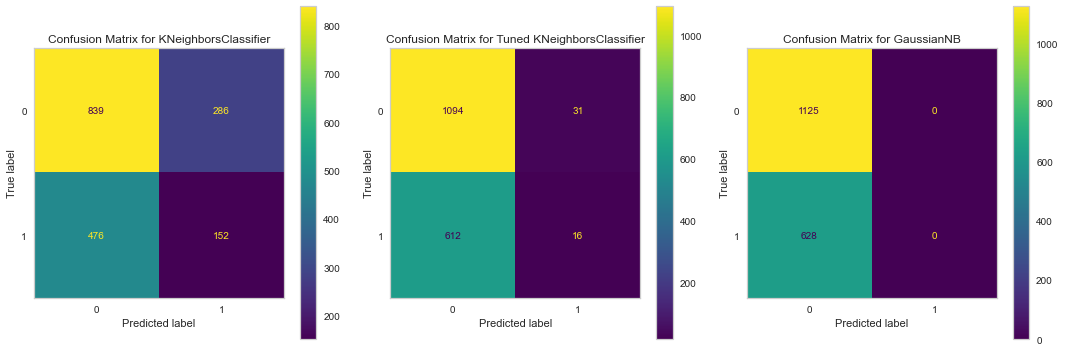

In [44]:
fig, axes= plt.subplots(1, 3, figsize= (15, 5))
print('KNeighborsClassifier Precision:', precision_score(y_test, y_pred_knn, zero_division= 0))
print('Tuned KNeighborsClassifier Precision:', precision_score(y_test, y_pred_tuned_knn, zero_division= 0))
print('GaussianNB Precision:', precision_score(y_test, y_pred_nb, zero_division= 0))

dcm_knn.plot(ax= axes[0])
axes[0].set_title('Confusion Matrix for KNeighborsClassifier')
axes[0].grid(linewidth= 0)

dcm_tuned_knn.plot(ax= axes[1])
axes[1].set_title('Confusion Matrix for Tuned KNeighborsClassifier')
axes[1].grid(linewidth= 0)

dcm_nb.plot(ax= axes[2])
axes[2].set_title('Confusion Matrix for GaussianNB')
axes[2].grid(linewidth= 0)

plt.tight_layout()
plt.show()

SVM Precision: 0.0
Random Forest Precision: 0.2641509433962264
Tuned Random Forest Precision: 0.2


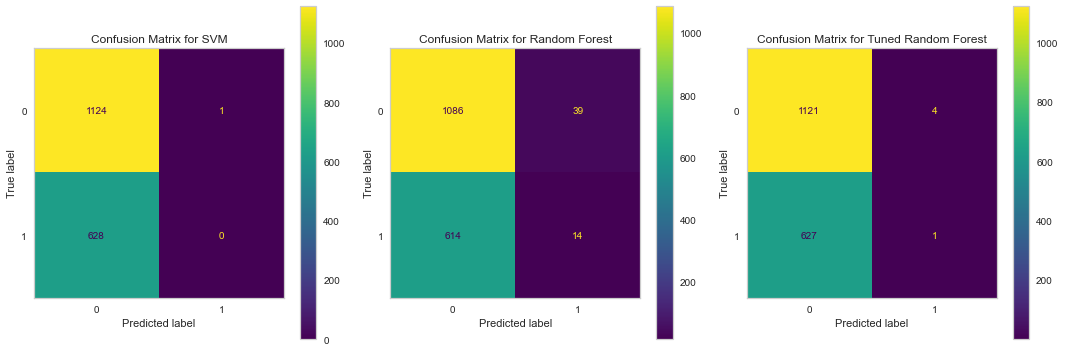

In [45]:
fig, axes= plt.subplots(1, 3, figsize= (15, 5))
print('SVM Precision:', precision_score(y_test, y_pred_svc, zero_division=0))
print('Random Forest Precision:', precision_score(y_test, y_pred_rf, zero_division=0))
print('Tuned Random Forest Precision:', precision_score(y_test, y_pred_tuned_rf, zero_division=0))

dcm_svc.plot(ax= axes[0])
axes[0].set_title('Confusion Matrix for SVM')
axes[0].grid(linewidth= 0)

dcm_rf.plot(ax= axes[1])
axes[1].set_title('Confusion Matrix for Random Forest')
axes[1].grid(linewidth= 0)

dcm_tuned_rf.plot(ax= axes[2])
axes[2].set_title('Confusion Matrix for Tuned Random Forest')
axes[2].grid(linewidth= 0)

plt.tight_layout()
plt.show()

AdaBoost Precision: 0.3157894736842105
Tuned AdaBoost Precision: 0.5
GradientBoosting Precision: 0.1935483870967742


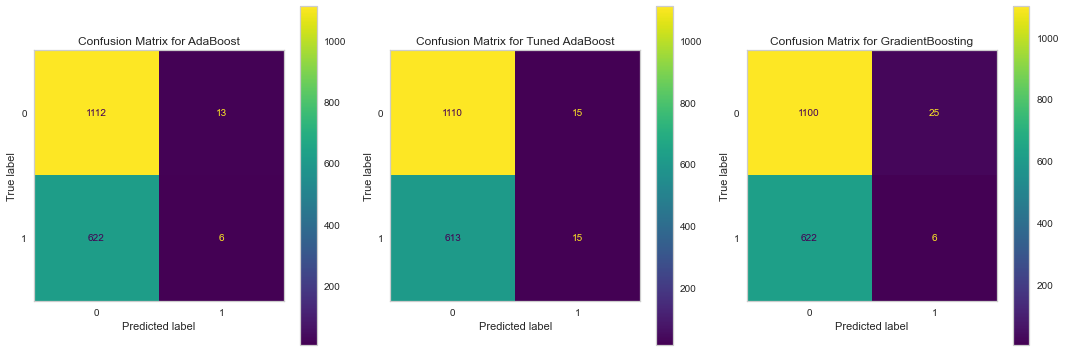

In [46]:
fig, axes= plt.subplots(1, 3, figsize= (15, 5))

print('AdaBoost Precision:', precision_score(y_test, y_pred_ada, zero_division=0))
print('Tuned AdaBoost Precision:', precision_score(y_test, y_pred_tuned_ada, zero_division=0))
print('GradientBoosting Precision:', precision_score(y_test, y_pred_grb, zero_division=0))

dcm_ada.plot(ax= axes[0])
axes[0].set_title('Confusion Matrix for AdaBoost')
axes[0].grid(linewidth= 0)

dcm_tuned_ada.plot(ax= axes[1])
axes[1].set_title('Confusion Matrix for Tuned AdaBoost')
axes[1].grid(linewidth= 0)

dcm_grb.plot(ax= axes[2])
axes[2].set_title('Confusion Matrix for GradientBoosting')
axes[2].grid(linewidth= 0)

plt.tight_layout()
plt.show()

Tuned GradientBoosting Precision: 0.37894736842105264
XGB Precision: 0.3886138613861386
Tuned XGB Precision: 0.3351063829787234


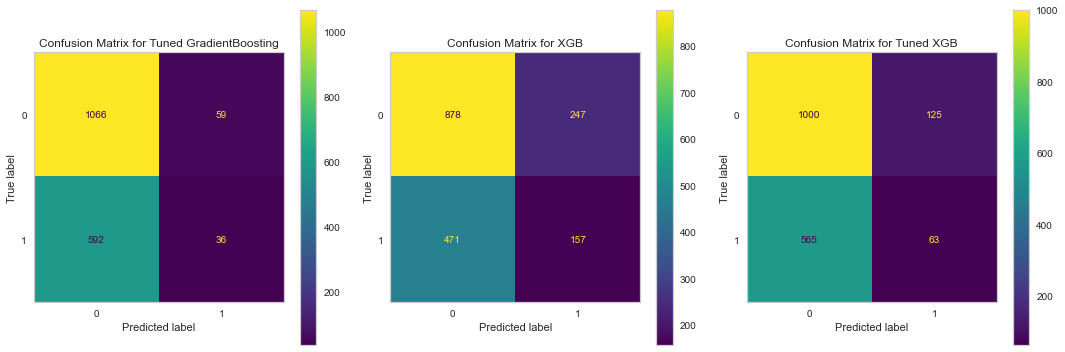

In [47]:
fig, axes= plt.subplots(1, 3, figsize= (15, 5))

print('Tuned GradientBoosting Precision:', precision_score(y_test, y_pred_tuned_grb, zero_division=0))
print('XGB Precision:', precision_score(y_test, y_pred_xgb, zero_division=0))
print('Tuned XGB Precision:', precision_score(y_test, y_pred_tuned_xgb, zero_division=0))

dcm_tuned_grb.plot(ax= axes[0])
axes[0].set_title('Confusion Matrix for Tuned GradientBoosting')
axes[0].grid(linewidth= 0)

dcm_xgb.plot(ax= axes[1])
axes[1].set_title('Confusion Matrix for XGB')
axes[1].grid(linewidth= 0)

dcm_tuned_xgb.plot(ax= axes[2])
axes[2].set_title('Confusion Matrix for Tuned XGB')
axes[2].grid(linewidth= 0)

plt.tight_layout()
plt.show()

LGBM Precision: 0.29285714285714287
Tuned LGBM Precision: 0.44285714285714284
CatBoost Precision: 0.37209302325581395
Tuned CatBoost Precision: 0.0


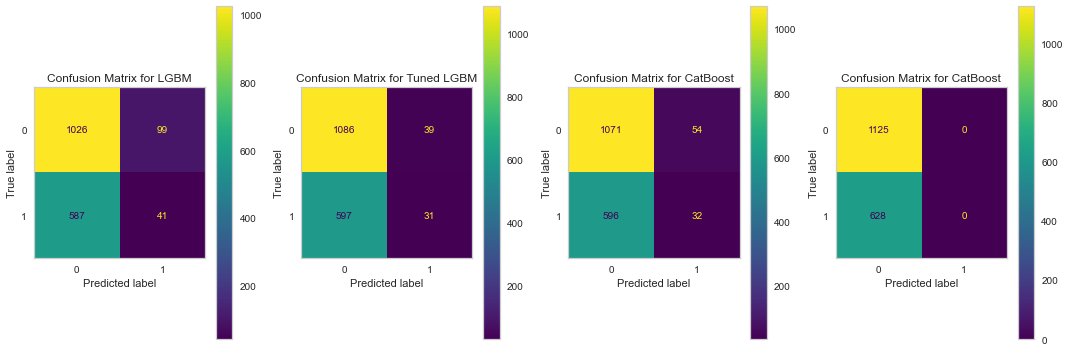

In [48]:
fig, axes= plt.subplots(1, 4, figsize= (15, 5))

print('LGBM Precision:', precision_score(y_test, y_pred_lgm, zero_division=0))
print('Tuned LGBM Precision:', precision_score(y_test, y_pred_tuned_lgm, zero_division=0))
print('CatBoost Precision:', precision_score(y_test, y_pred_cat, zero_division=0))
print('Tuned CatBoost Precision:', precision_score(y_test, y_pred_tuned_cat, zero_division=0))

dcm_lgm.plot(ax= axes[0])
axes[0].set_title('Confusion Matrix for LGBM')
axes[0].grid(linewidth= 0)

dcm_tuned_lgm.plot(ax= axes[1])
axes[1].set_title('Confusion Matrix for Tuned LGBM')
axes[1].grid(linewidth= 0)

dcm_cat.plot(ax= axes[2])
axes[2].set_title('Confusion Matrix for CatBoost')
axes[2].grid(linewidth= 0)

dcm_tuned_cat.plot(ax= axes[3])
axes[3].set_title('Confusion Matrix for CatBoost')
axes[3].grid(linewidth= 0)

plt.tight_layout()
plt.show()